# Billboard Hot 100 Weekly Chart EDA

ทดลองการทำ Exploratory Data Analysis (EDA) ด้วยตัวเองโดยใช้ข้อมูลของการชาร์จเพลง Billboard Hot 100 โดยเอาข้อมูลมาจาก
https://data.world/kcmillersean/billboard-hot-100-1958-2017
โดยชาร์จที่นำเสนอจะอยู่ในช่วง 8/2/1958 ถึง 12/28/2019


- Billboard Chart URL (ลิ้งของชาร์จเพลง Billboard Hot 100 ในแต่ละสัปดาห์)
- WeekID (วัน/เดือน/ปี) ของชาร์จที่จัด
- Song name ชื่อเพลง
- Performer name ชื่อนักดนตรี
- SongID - Concatenation of song & performer (ชื่อเพลงและนักดนตรีรวมกัน)
- Current week on chart ตำแหน่งประจำสัปดาห์
- Instance (this is used to separate breaks on the chart for a given song. Example, an instance of 6 tells you that this is   the sixth time this song has appeared on the chart) จำนวนครั้งที่เข้ามาในชาร์จ
- Previous week position ตำแหน่งในสัปดาห์ที่แล้ว
- Peak Position (as of the corresponding week) ตำแหน่งสูงสุดที่ทำได้
- Weeks on Chart (as of the corresponding week) จำนวนสัปดาห์ที่อยู่ในชาร์จ


## การเตรียมการ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV File
df = pd.read_csv('data\Hot Stuff.csv')

In [3]:
df.head(5)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [4]:
#Drop 'url' columns because not necessary
df = df.drop('url',axis=1)

In [5]:
df.head(5)

,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [6]:
#Drop 'SongID' columns because not necessary
df = df.drop('SongID',axis=1)
df.head()

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,8/2/1958,1,Poor Little Fool,Ricky Nelson,1,NaN,1,1
1,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,1,NaN,1,1
2,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,1,NaN,1,1
3,7/1/2006,1,Do I Make You Proud,Taylor Hicks,1,NaN,1,1
4,10/24/2009,1,3,Britney Spears,1,NaN,1,1


In [7]:
#Song List
Song_list = pd.DataFrame(df.groupby('Song')['Performer'].unique())
# Song_list.to_csv('songlist.csv')

In [8]:
# Song_list.to_csv('songlist.csv')

In [27]:
Song_list

,Performer
Song,
"""B"" Girls",[Young And Restless]
"""Cherry Cherry"" from Hot August Night",[Neil Diamond]
"""Having A Party"" Medley",[The Ovations (Featuring Louis Williams)]
"""Joy"" Pt. I",[Isaac Hayes]
"""Roots"" Medley",[Quincy Jones]
...,...
teachme,[Musiq Soulchild]
whoa (mind in awe),[XXXTENTACION]
whoknows,[Musiq]


## Exploratory Data Analysis

### 1. 10 เพลงที่ติดชาร์จนานที่สุดใน Billboard Hot 100

In [9]:
Most_week = pd.DataFrame(df.groupby(['Song','Performer'])['Weeks on Chart'].max())

In [15]:
# Most_week.head(5)
# Most_week['Weeks on Chart'].max()

87

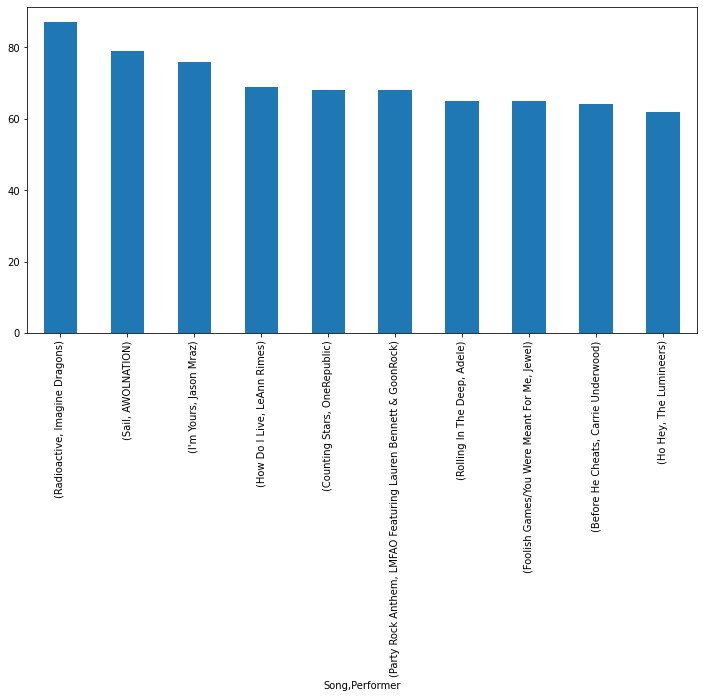

In [17]:
plt.figure(figsize=(12,6))
Most_week['Weeks on Chart'].sort_values(ascending=False).head(10).plot(kind='bar')

### 2. 10 นักร้องที่มีเพลงติดในชาร์จมากที่สุดใน Billboard Hot 100

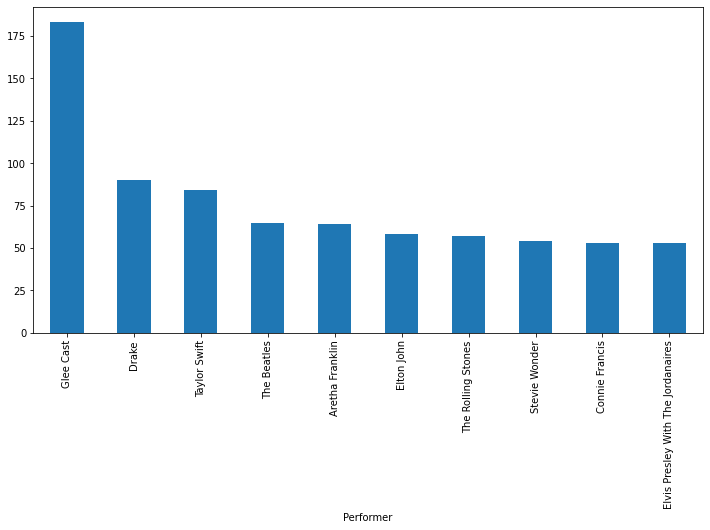

In [52]:
plt.figure(figsize=(12,6))
df.groupby(['Performer'])['Song'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')

### 3. เพลงที่สามารถทำอันดับ 1 ภายในสัปดาห์แรกเมื่อติดชาร์จของ Billboard Hot 100

In [55]:
fwf = df[(df['Weeks on Chart'] == 1) & (df['Week Position'] == 1) & (df['Previous Week Position'].isnull())]

In [67]:
fwf['WeekID'] = pd.to_datetime(fwf.WeekID)

C:\Users\Admin\anaconda3\envs\DS3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
fwf.sort_values('WeekID',ignore_index=True)

,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,1958-08-02,1,Poor Little Fool,Ricky Nelson,1,NaN,1,1
1,1995-09-02,1,You Are Not Alone,Michael Jackson,1,NaN,1,1
2,1995-09-30,1,Fantasy,Mariah Carey,1,NaN,1,1
3,1995-11-25,1,"Exhale (Shoop Shoop) (From ""Waiting To Exhale"")",Whitney Houston,1,NaN,1,1
4,1995-12-02,1,One Sweet Day,Mariah Carey & Boyz II Men,1,NaN,1,1
5,1997-06-14,1,I'll Be Missing You,Puff Daddy & Faith Evans Featuring 112,1,NaN,1,1
6,1997-09-13,1,Honey,Mariah Carey,1,NaN,1,1
7,1997-10-11,1,Candle In The Wind 1997/Something About The Wa...,Elton John,1,NaN,1,1
8,1998-02-28,1,My Heart Will Go On,Celine Dion,1,NaN,1,1
9,1998-09-05,1,I Don't Want To Miss A Thing,Aerosmith,1,NaN,1,1


### 4. เพลงที่ทำกลับมาติดชาร์จมากที่สุด

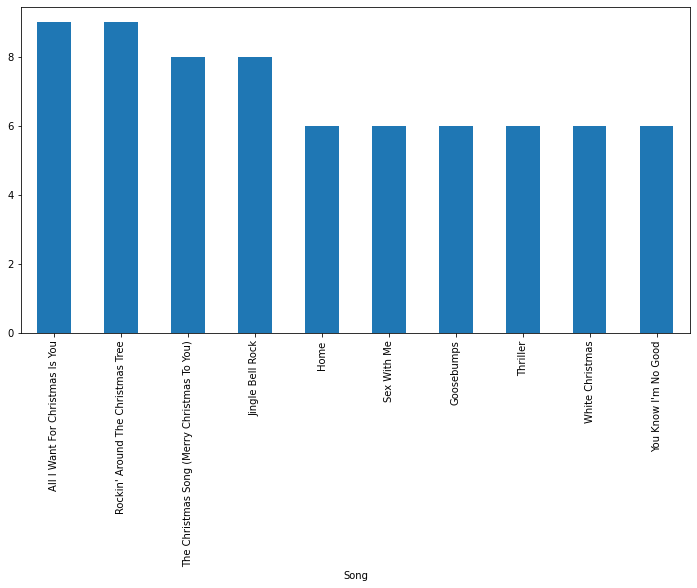

In [77]:
plt.figure(figsize=(12,6))
df.groupby('Song')['Instance'].max().sort_values(ascending=False).head(10).plot(kind='bar')

In [78]:
most_instance = pd.DataFrame(df.groupby('Song')['Instance'].max().sort_values(ascending=False))

In [81]:
most_instance.head(10)

,Instance
Song,
All I Want For Christmas Is You,9
Rockin' Around The Christmas Tree,9
The Christmas Song (Merry Christmas To You),8
Jingle Bell Rock,8
Home,6
Sex With Me,6
Goosebumps,6
Thriller,6
White Christmas,6


เพลงที่กลับมาติดชาร์ตสูงสุดจะพบว่า เนื่อหน้าของเพลงจะเป็นเนื่้อหาที่เกี่ยวกับวันคริสมาสต์ซึ่งเป็นหนึ่งในเหตุผลที่เพลงจะกลับเข้ามาในชาร์ตหลายครั้ง